<a href="https://colab.research.google.com/github/Hugekyung/NLP/blob/master/LSA_gensim%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# gensim을 활용한 LSA

## 유사도 계산, 시각화를 위한 함수

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def calc_similarity_matrix(vectors) :
  def cosine_similarity(a, b) : 
    return dot(a, b)/(norm(a)*norm(b))

  n_word = len(vectors)
  similarity_matrix = np.zeros((n_word, n_word))

  for i in range(n_word) :
    for j in range(i, n_word) :
      similarity_matrix[j, i] = cosine_similarity(vectors[i], vectors[j]).round(4)  

  return similarity_matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_similarity(similarity_matrix) :
  uniform_data = similarity_matrix
  mask = np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
  plt.rcParams['figure.figsize'] = [8, 6]
  ax = sns.heatmap(uniform_data, mask=mask, #xticklabels=features, yticklabels=features, 
                  annot=True, fmt=".2f",annot_kws={'size':8}, cmap='coolwarm')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.manifold import TSNE
import numpy as np

def visualize_vectors(vectors, labels):
  tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
  np.set_printoptions(suppress=True)
  T = tsne.fit_transform(vectors)
  #labels = vocab

  plt.figure(figsize=(10, 6))
  plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
  for label, x, y in zip(labels, T[:, 0], T[:, 1]):
      plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

## 1.토픽모델링

In [ ]:
docs = ['바나나 사과 포도 포도',
        '사과 포도',
        '포도 바나나',
        '짜장면 짬뽕 탕수육',
        '볶음밥 탕수육',
        '짜장면 짬뽕',
        '된장찌개 김치찌개 김치 비빔밥',
        '김치 된장 비빔밥',
        '비빔밥 김치',
        '사과 볶음밥 김치 된장']

In [ ]:
doc_ls = [doc.split() for doc in docs]
doc_ls

[['바나나', '사과', '포도', '포도'],
 ['사과', '포도'],
 ['포도', '바나나'],
 ['짜장면', '짬뽕', '탕수육'],
 ['볶음밥', '탕수육'],
 ['짜장면', '짬뽕'],
 ['된장찌개', '김치찌개', '김치', '비빔밥'],
 ['김치', '된장', '비빔밥'],
 ['비빔밥', '김치'],
 ['사과', '볶음밥', '김치', '된장']]

In [ ]:
from gensim import corpora
from gensim.models import LsiModel
from gensim.models import TfidfModel

n_dim = 4

id2word = corpora.Dictionary(doc_ls)
corpus_TDM = [id2word.doc2bow(text) for text in doc_ls]
tfidf = TfidfModel(corpus_TDM) # train
corpus_TFIDF = tfidf[corpus_TDM] # predict
model_LSA = LsiModel(corpus_TFIDF, id2word=id2word, num_topics=n_dim)

for top in model_LSA.print_topics(n_dim, 3):
    print(top)

(0, '0.688*"포도" + 0.450*"사과" + 0.429*"바나나"')
(1, '0.553*"비빔밥" + 0.502*"김치" + 0.413*"된장"')
(2, '-0.601*"짜장면" + -0.601*"짬뽕" + -0.448*"탕수육"')
(3, '-0.643*"볶음밥" + 0.335*"비빔밥" + -0.321*"탕수육"')


In [ ]:
model_LSA.projection.u

array([[ 0.42907415, -0.22374629,  0.00586128,  0.16298737],
       [ 0.45036418, -0.04247229, -0.00217236, -0.20464512],
       [ 0.68834468, -0.31566149,  0.00727004,  0.11462753],
       [ 0.02111362,  0.07999208, -0.60076233,  0.27104029],
       [ 0.02111362,  0.07999208, -0.60076233,  0.27104029],
       [ 0.05358556,  0.12182224, -0.44760134, -0.32127392],
       [ 0.15182318,  0.22006537, -0.16731104, -0.64296515],
       [ 0.19403609,  0.50155059,  0.11977961,  0.10452244],
       [ 0.04066222,  0.14870366,  0.04990982,  0.19832509],
       [ 0.04066222,  0.14870366,  0.04990982,  0.19832509],
       [ 0.17195924,  0.55320806,  0.16244381,  0.33468532],
       [ 0.2047169 ,  0.4130459 ,  0.06340543, -0.23079069]])

In [ ]:
from gensim.matutils import sparse2full
corpus_VT = model_LSA[corpus_TDM]
VT = [sparse2full(doc_vector, n_dim).tolist() for doc_vector in corpus_VT]
VT

[[2.2561275959014893,
  -0.8975415825843811,
  0.018228992819786072,
  0.18759731948375702],
 [1.1387088298797607,
  -0.3581337630748749,
  0.005097671877592802,
  -0.09001757949590683],
 [1.117418885231018,
  -0.5394077897071838,
  0.013131320476531982,
  0.27761492133140564],
 [0.09581279754638672,
  0.2818063795566559,
  -1.6491260528564453,
  0.22080665826797485],
 [0.2054087370634079,
  0.34188762307167053,
  -0.6149123907089233,
  -0.9642390608787537],
 [0.04222723841667175,
  0.15998415648937225,
  -1.2015246152877808,
  0.5420805811882019],
 [0.44731977581977844,
  1.352165937423706,
  0.3820430636405945,
  0.8358579277992249],
 [0.5707122087478638,
  1.4678045511245728,
  0.34562885761260986,
  0.20841707289218903],
 [0.365995317697525,
  1.0547586679458618,
  0.2822234332561493,
  0.4392077624797821],
 [1.0009403228759766,
  1.0921895503997803,
  0.01370164379477501,
  -0.9738785028457642]]

## 2.단어벡터

In [ ]:
for i in id2word.keys():
    print("{} : {}".format(id2word[i], model_LSA.projection.u[i]))

바나나 : [ 0.42907415 -0.22374629  0.00586128  0.16298737]
사과 : [ 0.45036418 -0.04247229 -0.00217236 -0.20464512]
포도 : [ 0.68834468 -0.31566149  0.00727004  0.11462753]
짜장면 : [ 0.02111362  0.07999208 -0.60076233  0.27104029]
짬뽕 : [ 0.02111362  0.07999208 -0.60076233  0.27104029]
탕수육 : [ 0.05358556  0.12182224 -0.44760134 -0.32127392]
볶음밥 : [ 0.15182318  0.22006537 -0.16731104 -0.64296515]
김치 : [0.19403609 0.50155059 0.11977961 0.10452244]
김치찌개 : [0.04066222 0.14870366 0.04990982 0.19832509]
된장찌개 : [0.04066222 0.14870366 0.04990982 0.19832509]
비빔밥 : [0.17195924 0.55320806 0.16244381 0.33468532]
된장 : [ 0.2047169   0.4130459   0.06340543 -0.23079069]


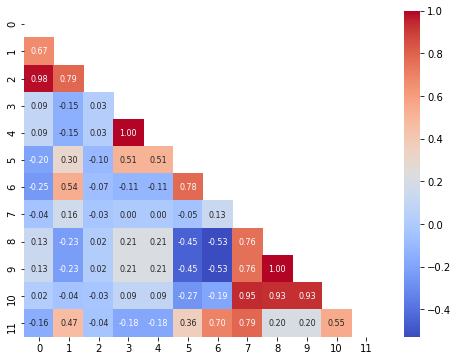

In [ ]:
word_vectors = model_LSA.projection.u
word_similarity_matrix = calc_similarity_matrix(word_vectors)
visualize_similarity(word_similarity_matrix)

## 3.문서벡터

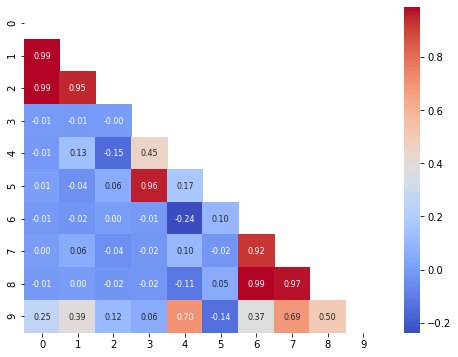

In [ ]:
from gensim.matutils import  sparse2full
corpus_V = model_LSA[corpus_TDM]
V = [sparse2full(doc_vector, n_dim).tolist() for doc_vector in corpus_VT]

doc_vectors = V
doc_similarity_matrix = calc_similarity_matrix(doc_vectors)
visualize_similarity(doc_similarity_matrix)

## 4.벡터시각화

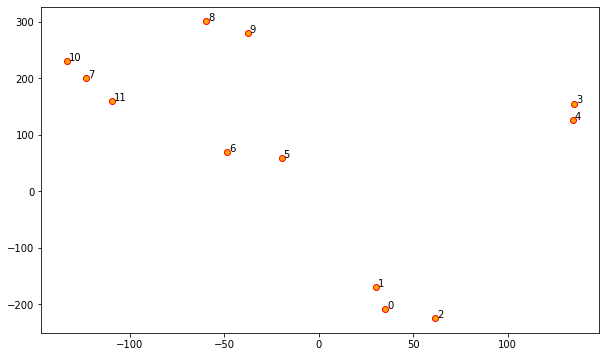

In [ ]:
vectors = word_vectors
labels = [k for k in id2word.keys()]

visualize_vectors(vectors, labels)